# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from pylab import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [3]:
salaries = pd.read_csv('C:/files/code/big data/cs-109/data/HW1/lahman/salaries.csv')
teams = pd.read_csv('C:/files/code/big data/cs-109/data/HW1/lahman/teams.csv')
salaries.head(1)
teams.head(1)

,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1


#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [4]:
salaries_summary = salaries.groupby(by=['yearID', 'teamID'], as_index=False).sum()
salaries_summary.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [5]:
columns_needed = ['yearID', 'teamID', 'salary', 'W']
wins_salary_summary = pd.merge(left=salaries_summary, right=teams, on=['yearID', 'teamID'])
wins_salary_summary = wins_salary_summary[columns_needed]
wins_salary_summary.head()

,yearID,teamID,salary,W
0,1985,ATL,14807000,66
1,1985,BAL,11560712,83
2,1985,BOS,10897560,81
3,1985,CAL,14427894,90
4,1985,CHA,9846178,85


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


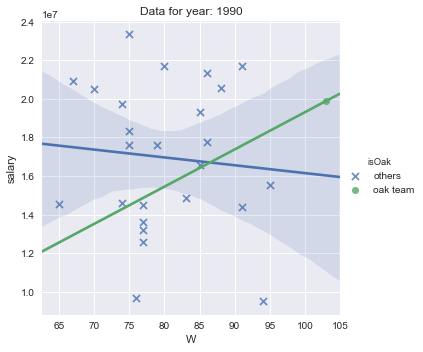

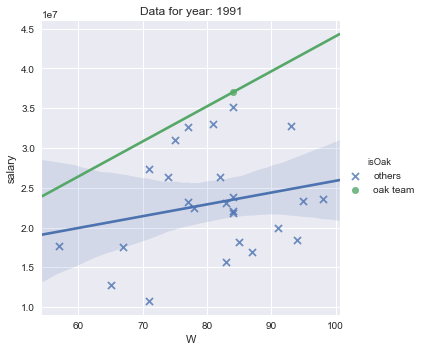

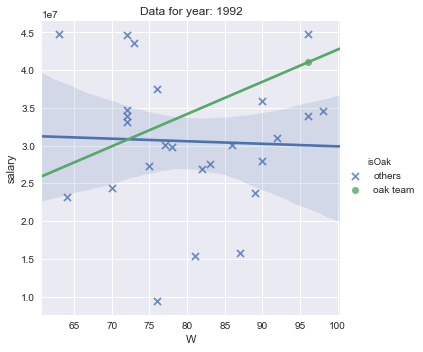

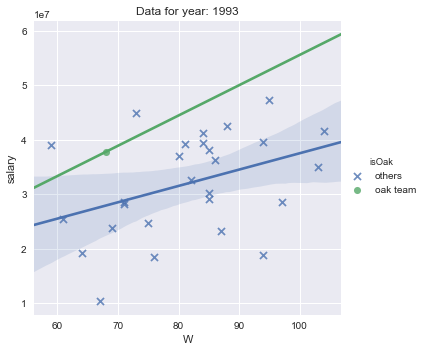

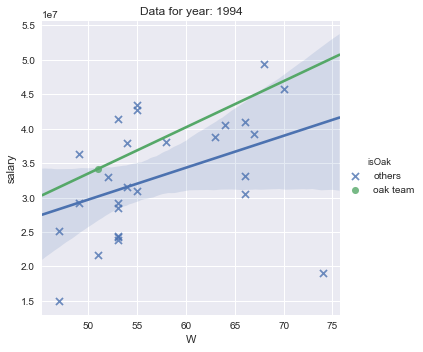

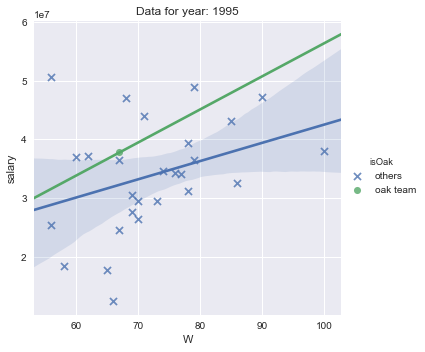

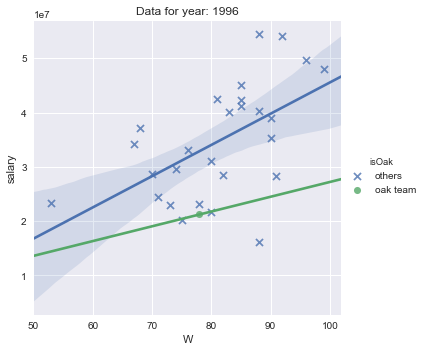

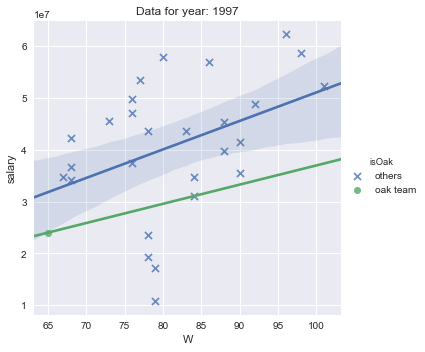

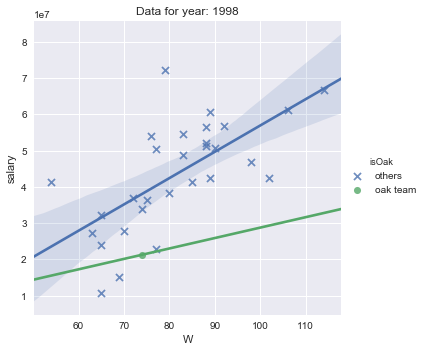

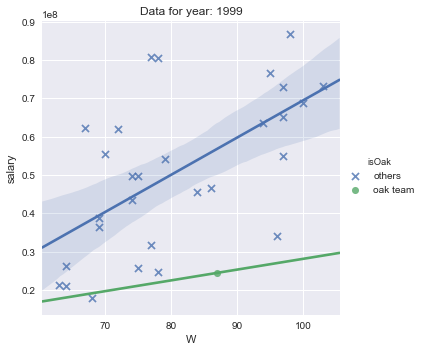

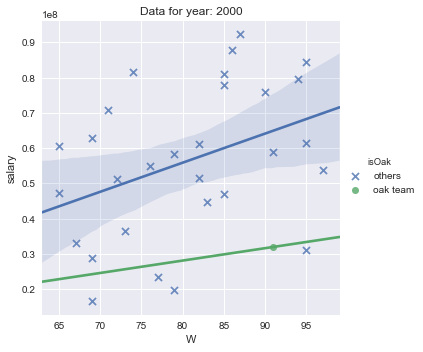

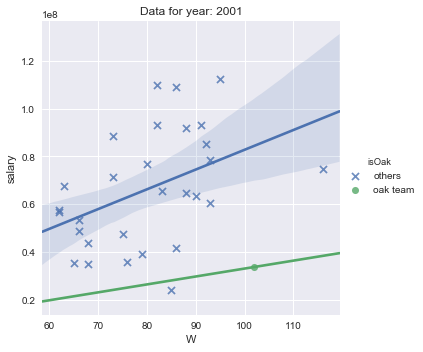

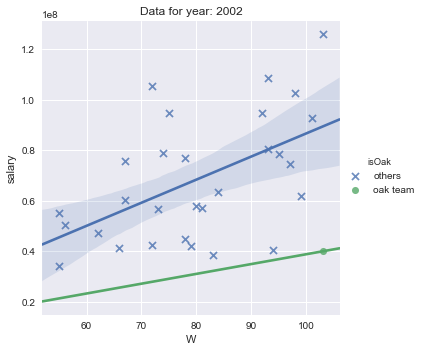

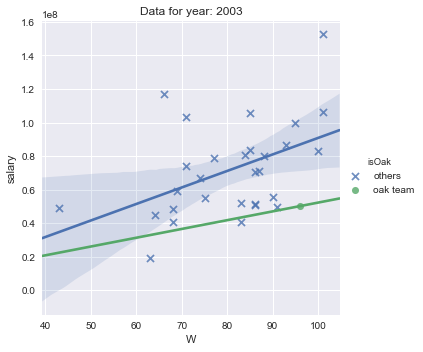

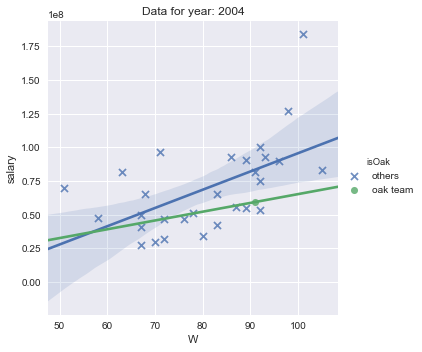

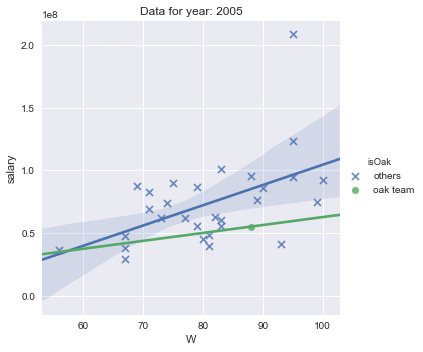

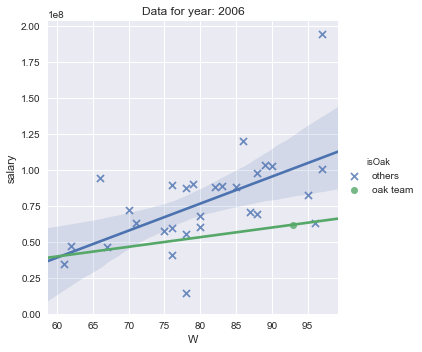

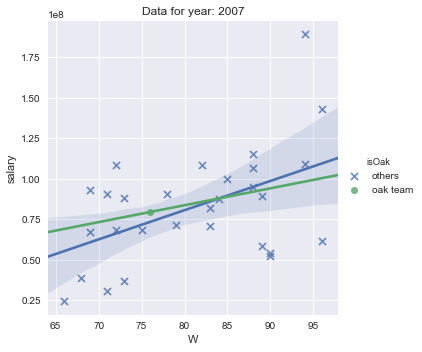

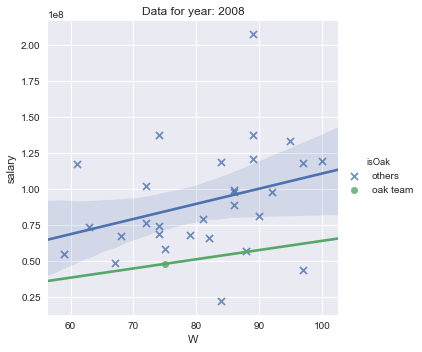

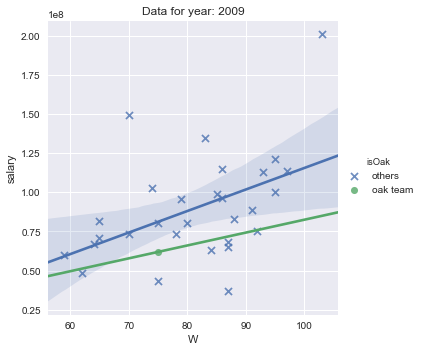

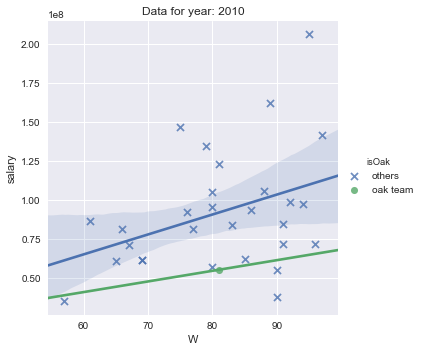

In [6]:
years = range(1990, 2011, 1)
teamName = 'OAK'

for year in years:
    df = wins_salary_summary[wins_salary_summary.yearID == year].copy()
    df['isOak'] = np.where(df.teamID == teamName, 'oak team', 'others')
    sns.lmplot(data=df, x='W', y='salary', hue = 'isOak', markers=["x", "o"], scatter_kws={"s": 50})
    title = 'Data for year: ' + str(year)
    plt.title(title)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

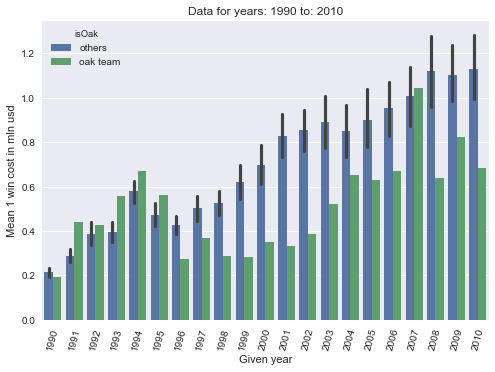

In [7]:
years = range(1990, 2011, 1)

df = wins_salary_summary[wins_salary_summary.yearID.isin(years)].copy()
df['isOak'] = np.where(df.teamID == teamName, 'oak team', 'others')
df['winCost'] = (df.salary / 1000000) /  df.W

sns.barplot(data=df, x='yearID', y='winCost', hue='isOak')
plt.ylabel('Mean 1 win cost in mln usd')
plt.xlabel('Given year')
title = 'Data for years: ' + str(years.start) + ' to: ' + str(years.stop - 1)
plt.title(title)
plt.xticks(rotation=75)

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 


I decided to show every year using scatter plot and then show cost of one win in millions. First plot show me how OAK team looks among other teams and second one shows how much wins depends on salary.
Oakland team had increasing number of wins since year 1998 with no significant salary changes.
We can also see that since 1996 they had much smaller cost of winning a match compared to other teams.
Charts of salary / wins in years 2000-2003 shows how other teams getting close to ratio of OAK team.

## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [10]:
countries = pd.read_csv('C:/files/code/big data/cs-109/data/HW1/countries.csv')
countries.head(1)
income = pd.read_excel('C:/files/code/big data/cs-109/data/HW1/indicator gapminder gdp_per_capita_ppp.xlsx')
income.head(3)

,Country,Region
0,Algeria,AFRICA


,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [11]:
income.index=income[income.columns[0]] # Make the countries as the index
income = income.drop(income.columns[0], axis = 1) 
income.columns = map(lambda x: int(x), income.columns) # Convert years from floats to ints
incomeT = income.transpose()
incomeT.head()

incomeCleared = incomeT.dropna(how='any', axis=1)
incomeCleared.head(1)
incomeCleared.shape

countries.index = countries.Country
countries = countries.drop('Country', axis=1)
countries

GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
1800,NaN,603.0,NaN,667.0,716.0,NaN,1197.0,618.0,NaN,757.0,...,NaN,NaN,877.0,NaN,663.0,869.0,NaN,507.0,NaN,NaN
1801,NaN,603.0,NaN,667.0,716.0,NaN,1199.0,620.0,NaN,757.0,...,NaN,NaN,879.0,NaN,665.0,870.0,NaN,507.0,NaN,NaN
1802,NaN,603.0,NaN,668.0,717.0,NaN,1201.0,623.0,NaN,757.0,...,NaN,NaN,882.0,NaN,667.0,871.0,NaN,507.0,NaN,NaN
1803,NaN,603.0,NaN,668.0,718.0,NaN,1204.0,626.0,NaN,757.0,...,NaN,NaN,884.0,NaN,668.0,872.0,NaN,507.0,NaN,NaN
1804,NaN,603.0,NaN,668.0,719.0,NaN,1206.0,628.0,NaN,757.0,...,NaN,NaN,887.0,NaN,670.0,873.0,NaN,508.0,NaN,NaN


GDP per capita,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,West Bank and Gaza,Vietnam,Yemen,Zambia,Zimbabwe,South Sudan
1800,603.0,667.0,716.0,1197.0,618.0,757.0,1507.0,514.0,833.0,815.0,...,1758.0,502.0,585.0,682.0,1220.0,861.0,877.0,663.0,869.0,507.0


(216, 201)

,Region
Country,
Algeria,AFRICA
Angola,AFRICA
Benin,AFRICA
Botswana,AFRICA
Burkina,AFRICA
Burundi,AFRICA
Cameroon,AFRICA
Cape Verde,AFRICA
Central African Republic,AFRICA


#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

C:\Users\Mateusz\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


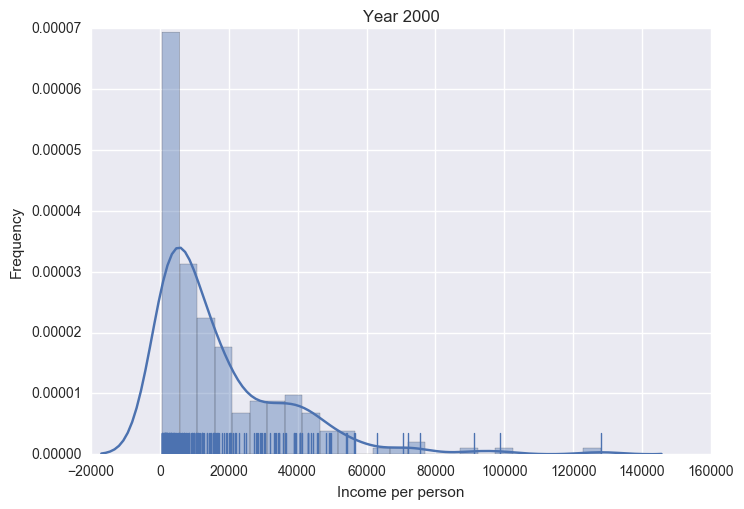

In [176]:
year = 2010
df = incomeCleared.loc[year,:]

sns.distplot(df, kde=True, rug=True, bins=25);
plt.title('Year 2000')
plt.xlabel('Income per person')
plt.ylabel('Frequency')

C:\Users\Mateusz\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


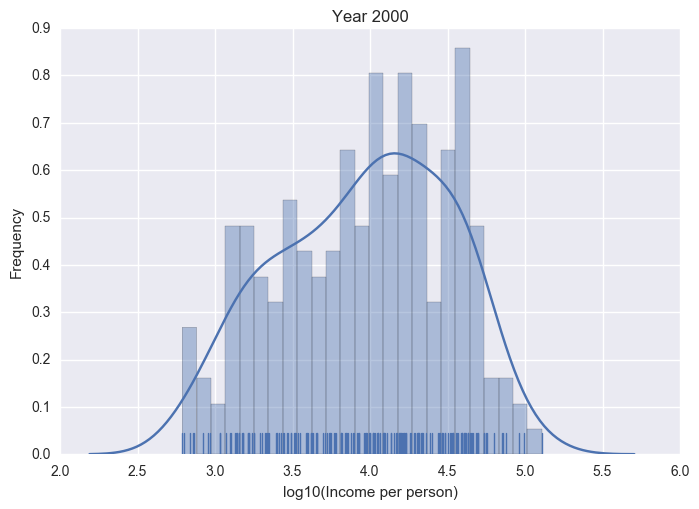

In [178]:
sns.distplot(np.log10(df), kde=True, rug=True, bins=25);
plt.title('Year 2000')
plt.xlabel('log10(Income per person)')
plt.ylabel('Frequency')

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""

In [17]:
df = incomeT.loc[2010,:].to_frame()
df = df.dropna()
df = pd.merge(left=df, right=countries, how='left', left_index=True, right_index=True)
df = df.reset_index()
df.columns = ['Country', 'GDP per capita', 'Region']
df

,Country,GDP per capita,Region
0,Afghanistan,1637.0,ASIA
1,Albania,9374.0,EUROPE
2,Algeria,12494.0,AFRICA
3,Andorra,38982.0,EUROPE
4,Angola,7047.0,AFRICA
5,Antigua and Barbuda,20567.0,NORTH AMERICA
6,Argentina,15765.0,SOUTH AMERICA
7,Armenia,6508.0,EUROPE
8,Aruba,33288.0,NaN
9,Australia,41330.0,OCEANIA


In [18]:
def mergeByYear(year):
    countries_in_year = incomeT.loc[year,:].to_frame()
    countries_in_year = countries_in_year.dropna()
    df = pd.merge(left=countries_in_year, right=countries, how='left', left_index=True, right_index=True)
    df = df.reset_index()
    df.columns = ['Country', 'Income', 'Region']
    return df

In [19]:
mergeByYear(2010)

,Country,Income,Region
0,Afghanistan,1637.0,ASIA
1,Albania,9374.0,EUROPE
2,Algeria,12494.0,AFRICA
3,Andorra,38982.0,EUROPE
4,Angola,7047.0,AFRICA
5,Antigua and Barbuda,20567.0,NORTH AMERICA
6,Argentina,15765.0,SOUTH AMERICA
7,Armenia,6508.0,EUROPE
8,Aruba,33288.0,NaN
9,Australia,41330.0,OCEANIA


#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

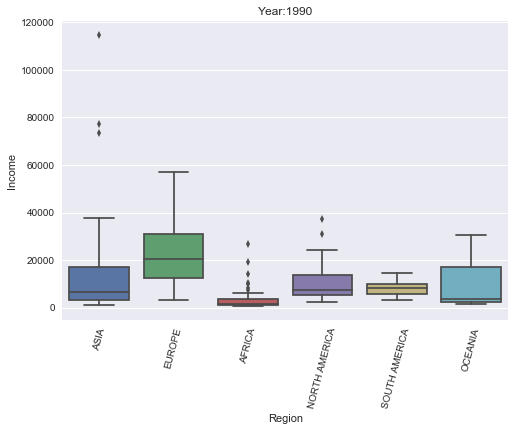

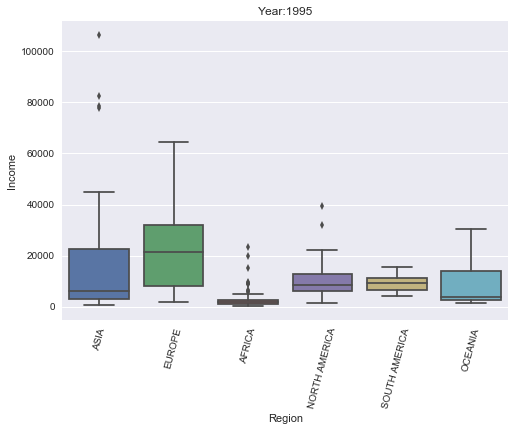

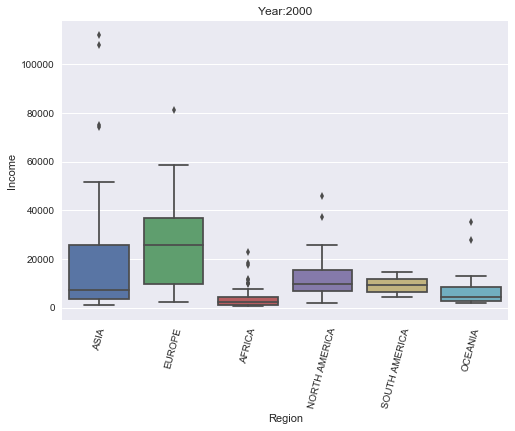

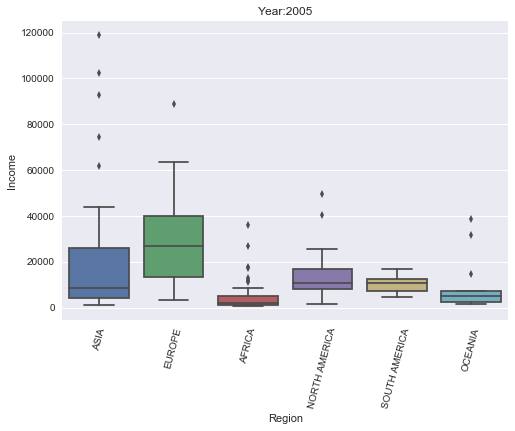

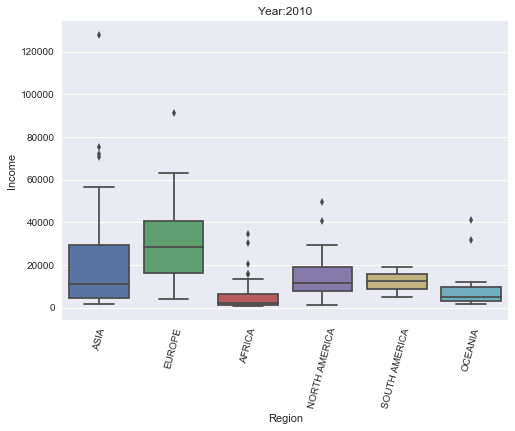

In [34]:
years = np.arange(1990, 2011, 5)

for year in years:
    plt.figure()
    data_by_year = mergeByYear(year)
    sns.boxplot(x='Region', y='Income', data=data_by_year)
    plt.title("Year:" + str(year))
    plt.xticks(rotation=75)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


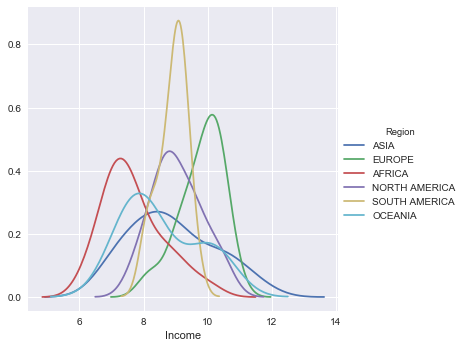

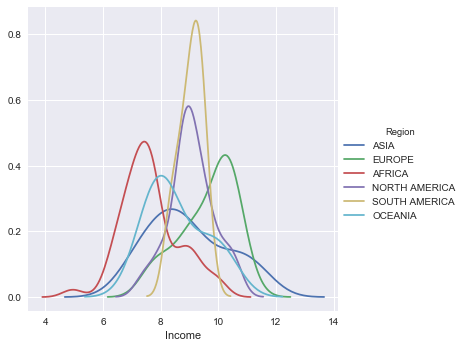

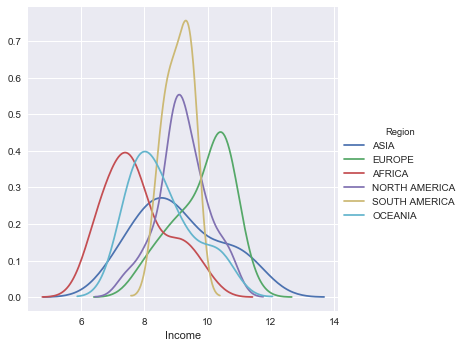

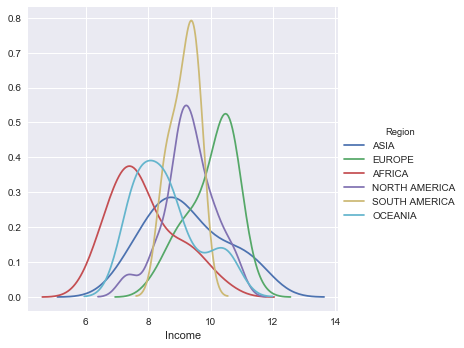

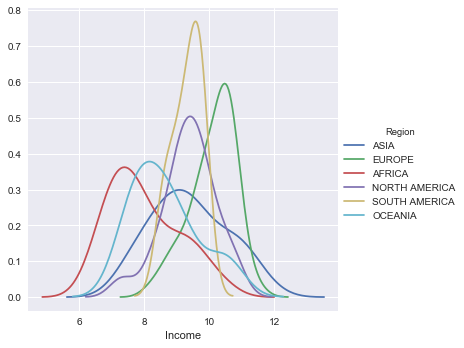

In [67]:
years = np.arange(1990, 2011, 5)

for year in years:
    #populate current year dataframe
    df = mergeByYear(year)
    #change income values to logarithmic scale
    df.Income = np.log(df.Income)
    #draw data
    g = sns.FacetGrid(df, hue="Region", size=5)
    g = g.map(sns.kdeplot, "Income")
    g.add_legend()

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


Describe how these change through the recent years?
Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades.

We can notice increasing number of countries that are gettich richer. In 2010 75% of countries had income greater than 16419 dollars. 
Africa recorded significant growth since 1995. Asia also had upwards trend since 1990. Other countries remained more constrant.
Almost 50% of european countries have Income per capta greater than somewhere about 75% of Asia countries.
Gap between Asia/Africa and Europe/NorthAmerica has decreased significantly. If it comes to Latin America there is a small decrease but not as apparent as in case of Asia and Africa.

## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [ ]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
#your code here

In [13]:
#your code here

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [14]:
#your code here

#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [15]:
#your code here

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [16]:
#your code here

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
